# PaperRAG: Document Processor

The PaperRAG custom loader enhances the capabilities of llmsherpa for figure extraction, enabling efficient parsing and extraction of figures and metadata from PDF documents. Utilizing asynchronous processing, it handles multiple documents simultaneously, significantly improving the speed and efficiency of the extraction process.


An example run:

- **Time taken to process the PDF:** 31.70 seconds
- **Number of documents:** 6
- **Pages parsed:** 96
- **Figures extracted:** 18
- **Tables extracted by figure-extraction parser:** 1 (Note: Sometimes tables are extracted as figures)
- **Tables extracted by pdf-extraction parser:** 23

*Note: 2 out of the 6 documents are provided in the data folder as these papers are open access.*

In [ ]:
import time
import os
import pandas as pd

import nest_asyncio 
nest_asyncio.apply() # only needed for jupyter notebooks

from document_loader import CustomLoader

dir_path = "../../data"
output_dir = "../../data/figures"

start_time = time.time()

loader = CustomLoader(pdf_path=dir_path, output_dir=output_dir, async_mode=True)
documents, figs = loader.load()

end_time = time.time()  

This function parses the content of a PDF document using a PDF extractor service. 
It extracts figures and metadata, including tables, from the document.

Example figure output:
```python
figs = [{
    'document': 'Sample Document',
    'figures': [
        {
            'caption': 'Fig. 1. Sample figure caption.',
            'captionBoundary': {'x1': 100, 'x2': 200, 'y1': 50, 'y2': 70},
            'figType': 'Figure',
            'imageText': 'Sample image text for figure 1.',
            'name': '1',
            'page': 1,
            'regionBoundary': {'x1': 90, 'x2': 210, 'y1': 40, 'y2': 80},
            'renderDpi': 300,
            'renderURL': '/path/to/sample-figure1.png'
        },
        {
            'caption': 'Fig. 2. Another sample figure caption.',
            'captionBoundary': {'x1': 120, 'x2': 220, 'y1': 60, 'y2': 80},
            'figType': 'Figure',
            'imageText': 'Sample image text for figure 2.',
            'name': '2',
            'page': 2,
            'regionBoundary': {'x1': 110, 'x2': 230, 'y1': 50, 'y2': 90},
            'renderDpi': 300,
            'renderURL': '/path/to/sample-figure2.png'
        }
    ],
    'tables': [
        {
            'caption': 'TABLE I. Sample table caption.',
            'captionBoundary': {'x1': 130, 'x2': 230, 'y1': 70, 'y2': 90},
            'figType': 'Table',
            'imageText': 'Sample image text for table 1.',
            'name': 'I',
            'page': 3,
            'regionBoundary': {'x1': 120, 'x2': 240, 'y1': 60, 'y2': 100},
            'renderDpi': 300,
            'renderURL': '/path/to/sample-table1.png'
        }
    ]
}.....]

In [ ]:
print(f"Time taken to process the PDF: {end_time - start_time} seconds")
print(f"Number of documents: {len(documents)}")

total_pages = sum(doc["pages"] for doc in figs)
print(f"Parsed: {total_pages} pages ")


total_figures = sum(doc["n_figures"] for doc in figs)
total_tables = sum(doc["n_tables"] for doc in figs)
print(f"Extracted: {total_figures} figures")
print(f"Extracted: {total_tables} tables by figure-extraction parser")

total_tables = sum(len(doc.tables()) for doc in documents)
print(f"Extracted: {total_tables} tables by pdf-extraction parser")


Time taken to process the PDF: 31.695379972457886 seconds
Number of documents: 6
Parsed: 96 pages 
Extracted: 18 figures
Extracted: 1 tables by figure-extraction parser
Extracted: 23 tables by pdf-extraction parser


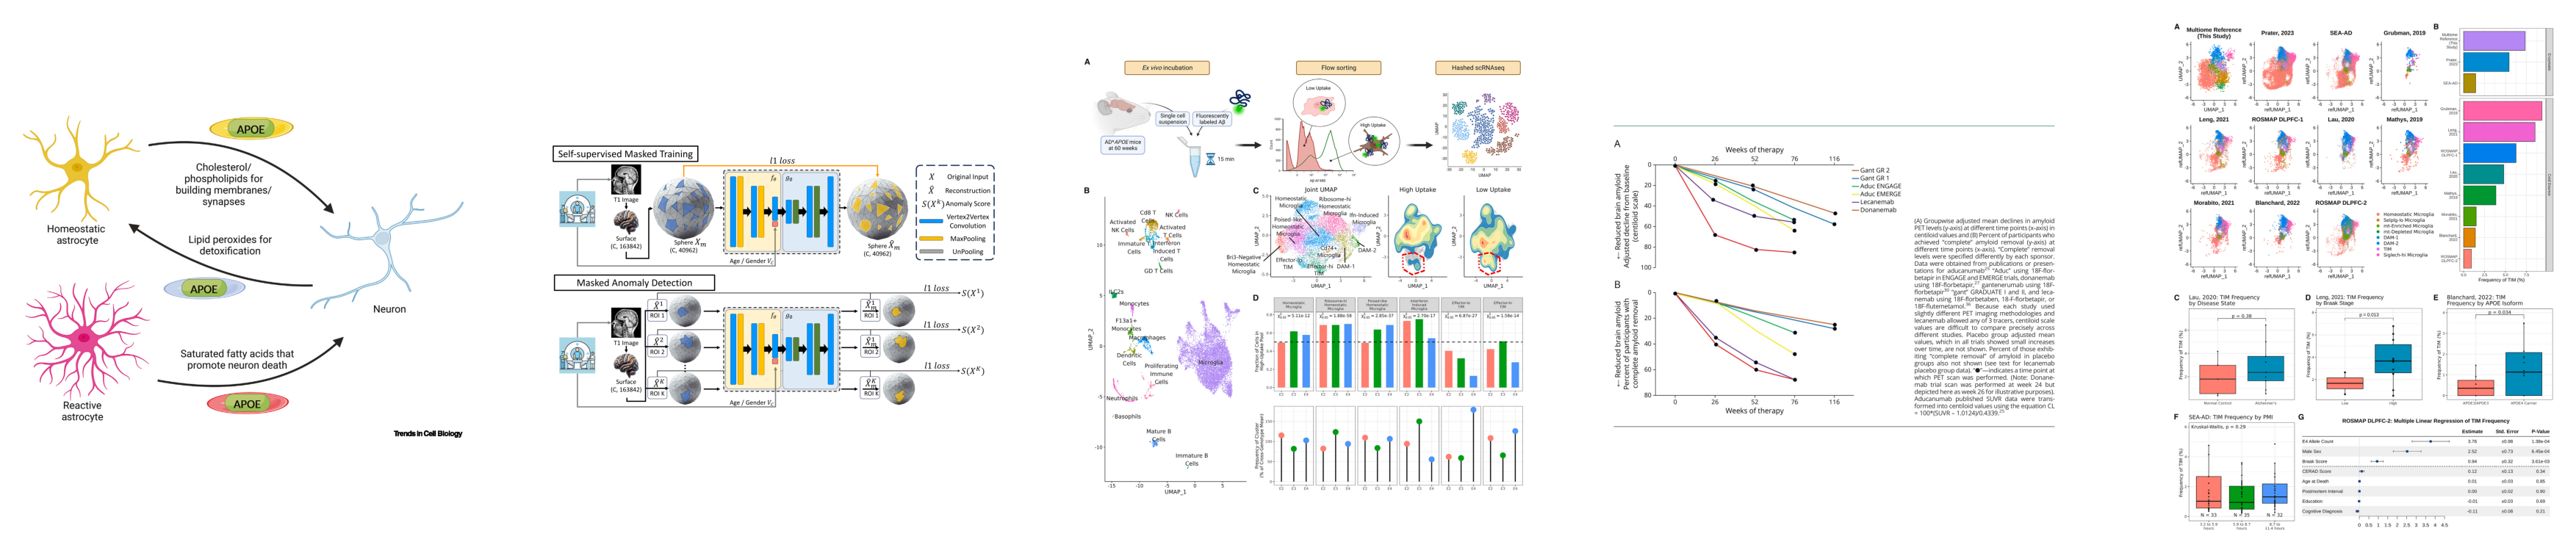

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

figure_paths = []
caption = []

for fig in figs:
    figure_paths.extend(fig["figures"])
    caption.extend(fig["figures_with_metadata"])
    

# append all figures iterating through each document and appending figures with metadta

selected_images = random.sample(figure_paths, 5)

# Display the images in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3), dpi=300)

for ax, img_path in zip(axes, selected_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

plt.show()

In [176]:
figure_paths = []
captions = []
image_texts = []

for fig in figs:
    figure_paths.extend(fig["figures"])
    for figure in fig["figures_with_metadata"]:
        captions.append(figure["metadata"]["caption"] if figure["metadata"]["caption"] else None)
        image_texts.append(figure["metadata"]["imageText"] if figure["metadata"]["imageText"] else None)

selected_images = random.sample(figure_paths, 5)
selected_captions = [captions[figure_paths.index(img_path)] for img_path in selected_images]

selected_captions

['Figure 1 Amyloid Cascade Hypothesis of Alzheimer Disease Pathogenesis and Its Related Therapeutic Conjectures',
 'Fig. 1. Our proposed Masked Mesh Net (MMN) framework.',
 'Figure 3. Multiome sequencing of AD*APOE4 mice at 60 weeks of age nominates regulatory features of TIM (A) Joint UMAP of RNA and ATAC features from the multiome library. (B) Volcano plot of chromVAR motif accessibility between TIM and DAM-2 cells. (C) Scores for two topics derived from the latent Dirichlet allocation of ATAC features and their associated transcription factors. (D) Heatmap of eRegulon enrichment and expression across microglial clusters. (E) Perturbation simulation plots ablating Fos andNkfb2. Expression of the respective transcription factor was set to 0, and the gene regulatory networks were reinitialized to generate new expression profiles for each cell. Cells are projected in a PCA space defined by the gene regulatory net. Arrow shade indicates the magnitude of the transition flow. (F) Circos pl

In [ ]:
for chunk in documents[0].chunks():
    print(chunk.to_text()) # print text chunks from the document

for section in documents[0].sections():
    print(section.to_text()) # print text sections from the document    

In [ ]:
# file: "data/Brain Imaging Anomaly Detection.pdf"
documents[0] # first document
documents[0].chunks() # get all chunks of the first document
documents[0].chunks()[0].to_text() # get the text of the first chunk of the first document
documents[0].chunks()[0].to_html() # get the html of the first chunk of the first document
documents[0].json

[{'bbox': [253.19, 30.71, 570.01, 37.68],
  'block_class': 'cls_0',
  'block_idx': 0,
  'level': 0,
  'page_idx': 0,
  'sentences': ['IEEE TRANSACTIONS ON MEDICAL IMAGING, VOL.',
   'XX, NO. XX, XXXX 2020 1'],
  'tag': 'para'},
 {'bbox': [49.37, 62.72, 562.63, 142.42000000000002],
  'block_class': 'cls_1',
  'block_idx': 1,
  'level': 1,
  'page_idx': 0,
  'sentences': ['Self-Supervised Masked Mesh Learning for Unsupervised Anomaly Detection on 3D Cortical Surfaces'],
  'tag': 'header'},
 {'bbox': [149.4, 154.78, 462.6, 179.08999999999997],
  'block_class': 'cls_2',
  'block_idx': 2,
  'level': 2,
  'page_idx': 0,
  'sentences': ['Hao-Chun Yang, Sicheng Dai, Saige Rutherford, Christian Gaser Andre F Marquand, Christian F Beckmann, Thomas Wolfers'],
  'tag': 'para'},
 {'bbox': [48.96, 236.38, 300.02, 464.52999999999946],
  'block_class': 'cls_4',
  'block_idx': 3,
  'level': 3,
  'page_idx': 0,
  'sentences': ['Abstract— Unsupervised anomaly detection in brain imaging is challenging.',


In [ ]:
import pandas as pd
from IPython.display import HTML

documents[3].tables() # get all tables of the fourth document
documents[3].tables()[0].to_html() # get the first table of the fourth document as a pandas dataframe
HTML(documents[3].tables()[0].to_html()) # display the first table of the fourth document as a pandas dataframe

Autosomal dominant tauopathies,3R or 4R or 3R+4R,MAPT-related frontotemporal dementia (MAPT)
,3R+4R,Vacuolar tauopathy (VT) (VCP)
Sporadic tauopathiesa,3R,Pick’s disease (PiD)
,4R,Progressive supranuclear palsy (PSP) Corticobasal degeneration (CBD) Argyrophilic grain disease (AGD) Globular glial tauopathy (GGT) Aging-related tau astrogliopathy (ARTAG) Tauopathy with hippocampal 4-repeat tau immunoreactive spherical inclusions
,3R+4R,"Primary age-related tauopathy (PART) Amyotrophic lateral sclerosis and parkinsonism-dementia complex (ALS/PDC) of Guam or Kii Diffuse neurofibrillary tangles with calcification, Kosaka-Shibayama disease (DNTC) Astroglial predominant tauopathy Postencephalitic parkinsonism Subacute sclerosing panencephalitis Nodding syndrome"
,3R+4R and 4R 3R+4R or 4R,Chronic traumatic encephalopathy (CTE) Progressive ataxia and palatal tremor
Autosomal dominant or recessive diseases with multiple pathologies including tauopathy,3R+4R,"Alzheimer’s disease (APP, PSEN1, PSEN2)"
,3R,"Down’s syndrome related Alzheimer’s disease (trisomy 21) Prion protein cerebral amyloidosis (PRNP) Familial British dementia (ITM2B) Familial Danish dementia (ITM2B) Niemann-Pick disease type C (NPC1, NPC2) Myotonic dystrophy type 1 and 2 (DMPK, ZNF9)"
Sporadic tauopathy with,β-amyloidosis 3R+4R,Alzheimer’s disease


In [ ]:
HTML(documents[2].tables()[0].to_html()) # display the first table of the third document

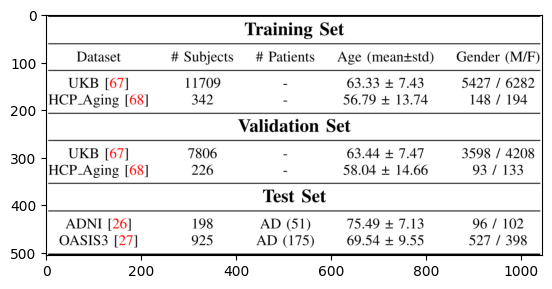

In [ ]:
# load the table extracted with figure extractor service (is a figure)
table_files = [f for f in os.listdir(output_dir) if "table" in f.lower()]

table_image_path = os.path.join(output_dir, table_files[0])
img = mpimg.imread(table_image_path)
plt.imshow(img) 

In [ ]:
filename = [f.split('-Table')[0] if '-Table' in f else f.split('-Figure')[0] for f in table_files] # get the filename without the '-Table' or '-Figure' suffix
metadata_file_path = os.path.join(output_dir, filename[0] + ".json") 

import json
with open(metadata_file_path) as f:
        metadata = json.load(f)

table_metadata = [item for item in metadata if item['figType'] == 'Table']
for item in table_metadata:
    item['imageText'] = ' '.join(item['imageText'])
table_metadata

[{'caption': 'TABLE I DEMOGRAPHICS OF THE DATASETS USED IN THE STUDY.',
  'captionBoundary': {'x1': 339.0010070800781,
   'x2': 536.003662109375,
   'y1': 60.09244918823242,
   'y2': 74.98895263671875},
  'figType': 'Table',
  'imageText': 'Test Set ADNI [26] 198 AD (51) 75.49 ± 7.13 96 / 102 OASIS3 [27] 925 AD (175) 69.54 ± 9.55 527 / 398 HCP Aging [68] 226 - 58.04 ± 14.66 93 / 133 Validation Set UKB [67] 7806 - 63.44 ± 7.47 3598 / 4208 UKB [67] 11709 - 63.33 ± 7.43 5427 / 6282 HCP Aging [68] 342 - 56.79 ± 13.74 148 / 194 Training Set Dataset # Subjects # Patients Age (mean±std) Gender (M/F)',
  'name': 'I',
  'page': 4,
  'regionBoundary': {'x1': 310.8, 'x2': 561.12, 'y1': 81.84, 'y2': 203.04},
  'renderDpi': 300,
  'renderURL': '/app/outputs/Brain Imaging Anomaly Detection-TableI-1.png'}]